In [13]:
import pandas as pd
from IPython.display import display
import numpy as np

spi = pd.read_csv('./dataset/dataset.csv')
spi.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [51]:
spf = spi.select_dtypes(include=['int64','float64'])
dtrain = spf.sample(frac=0.9, random_state=0)
dvalid = spf.drop(dtrain.index)
print(dtrain.dtypes)

#display(dtrain.head(4))

Unnamed: 0            int64
popularity            int64
duration_ms           int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object


In [52]:
max_ = dtrain.max(axis=0)
min_ = dtrain.min(axis=0)
dtrain = (dtrain - min_ ) / (max_ - min_)
dvalid = (dvalid - min_) / (max_ - min_)
X_train = dtrain.drop('Unnamed: 0', axis=1)
X_valid = dvalid.drop('Unnamed: 0', axis=1)
y_train = dtrain['Unnamed: 0']
y_valid = dvalid['Unnamed: 0']

print(X_train.shape)

(102600, 14)


In [53]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[14]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])


In [54]:
model.compile(
    optimizer='adam',
    loss='mae',
)


In [55]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=20,
)

Epoch 1/20
201/201 [==============================] - 5s 21ms/step - loss: 0.2417 - val_loss: 0.2380
Epoch 2/20
201/201 [==============================] - 6s 30ms/step - loss: 0.2330 - val_loss: 0.2341
Epoch 3/20
201/201 [==============================] - 5s 24ms/step - loss: 0.2304 - val_loss: 0.2325
Epoch 4/20
201/201 [==============================] - 6s 29ms/step - loss: 0.2276 - val_loss: 0.2301
Epoch 5/20
201/201 [==============================] - 6s 31ms/step - loss: 0.2255 - val_loss: 0.2271
Epoch 6/20
201/201 [==============================] - 6s 29ms/step - loss: 0.2236 - val_loss: 0.2254
Epoch 7/20
201/201 [==============================] - 5s 26ms/step - loss: 0.2218 - val_loss: 0.2269
Epoch 8/20
201/201 [==============================] - 6s 27ms/step - loss: 0.2209 - val_loss: 0.2231
Epoch 9/20
201/201 [==============================] - 6s 28ms/step - loss: 0.2191 - val_loss: 0.2234
Epoch 10/20
201/201 [==============================] - 5s 27ms/step - loss: 0.2179 - val_lo

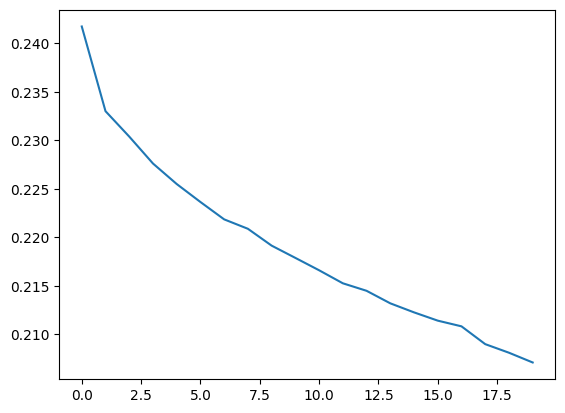

In [56]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();


<Axes: >

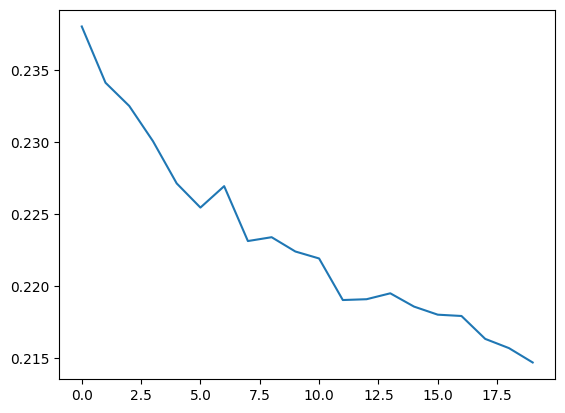

In [57]:
history_df['val_loss'].plot()

In [58]:
# Save the model to disk
import os
import sys
import shutil

save_dir = 'trainedmodels'
if os.path.exists(save_dir):
    shutil.rmtree(save_dir)
    print('Existing dir deleted')
    os.makedirs(save_dir)
else:
    pass
    
model.save(os.path.join(save_dir,'highqualitymodel.keras'))
print("data created")


# Later, load the model for deployment
#loaded_model = keras.models.load_model('path_to_saved_model')


Existing dir deleted
data created


In [59]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
401/401 [==============================] - 5s 14ms/step - loss: 0.2107 - val_loss: 0.2206
Epoch 2/10
401/401 [==============================] - 6s 14ms/step - loss: 0.2096 - val_loss: 0.2162
Epoch 3/10
401/401 [==============================] - 6s 15ms/step - loss: 0.2073 - val_loss: 0.2152
Epoch 4/10
401/401 [==============================] - 6s 16ms/step - loss: 0.2063 - val_loss: 0.2140
Epoch 5/10
401/401 [==============================] - 6s 16ms/step - loss: 0.2054 - val_loss: 0.2147
Epoch 6/10
401/401 [==============================] - 7s 17ms/step - loss: 0.2040 - val_loss: 0.2140
Epoch 7/10
401/401 [==============================] - 7s 17ms/step - loss: 0.2029 - val_loss: 0.2130
Epoch 8/10
401/401 [==============================] - 7s 16ms/step - loss: 0.2020 - val_loss: 0.2128
Epoch 9/10
401/401 [==============================] - 7s 16ms/step - loss: 0.2012 - val_loss: 0.2132
Epoch 10/10
401/401 [==============================] - 7s 16ms/step - loss: 0.1997 - val_lo

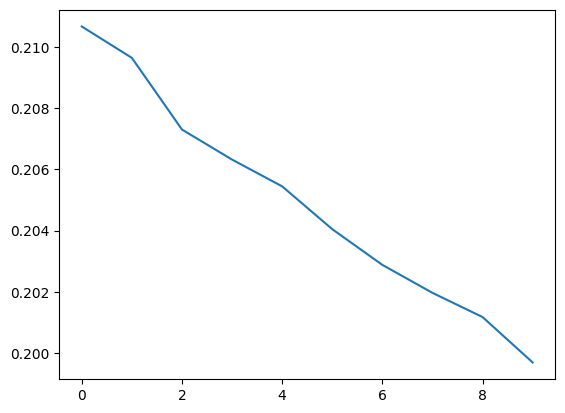

In [60]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();


<Axes: >

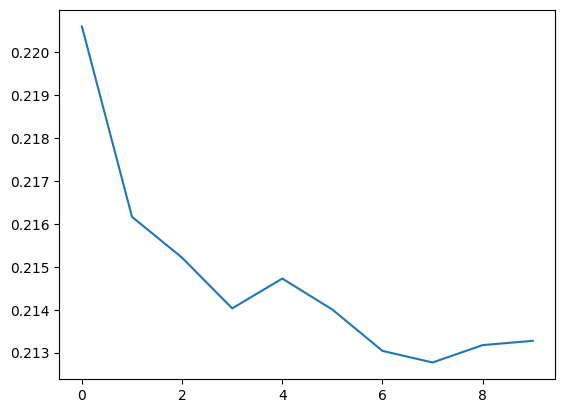

In [61]:
history_df['val_loss'].plot()

In [62]:
# Save the model to disk
import os
import sys
import shutil

save_dir = 'trainedmodels'
#if os.path.exists(save_dir):
 #   shutil.rmtree(save_dir)
  #  print('Existing dir deleted')
    #os.makedirs(save_dir)
#else:
 #   pass
    
model.save(os.path.join(save_dir,'lowqualitymodel.keras'))
print("data created")


# Later, load the model for deployment
#loaded_model = keras.models.load_model('path_to_saved_model')


data created
